<a href="https://colab.research.google.com/github/DarkMagicianK/SyS-UNCo/blob/main/Fourier_app2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Señales y Sistemas 2023
## Transformada de Fourier
App para jugar un poco con la transformada Fourier :)

In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Tue May 30 09:25:29 2023
# gui-dft-00.py: 
Se plotea una señal sin() en el tiempo y en frecuencia con dos sliders
# gui-dft-main.py:
Incorpora el espectro en un 2do subplot
@author: DarioM
"""
!pip install ipympl
from google.colab import output
output.enable_custom_widget_manager()

import numpy as np
from numpy.fft import fft,fftshift
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider
%matplotlib widget


0

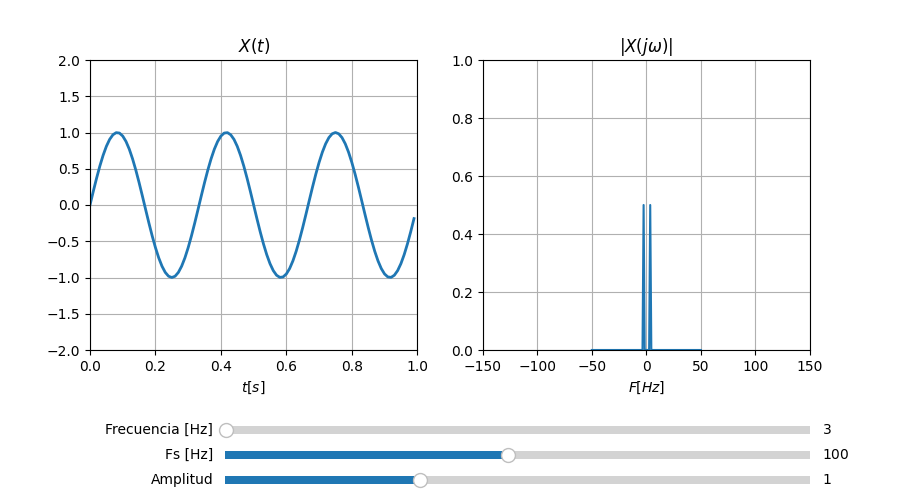

In [ ]:
# Funcion/es a plotear
#ax1 en tiempo
def signal_t(amp, frec,Ts):
    t = np.arange(0, 1, Ts)
    yt = amp * np.sin(2 * np.pi * frec * t)
    return t, yt

#ax2 en frecuencia
def tf(yt,Fs):
    tf = fftshift(np.abs(fft(yt)/len(yt)))
    f = np.linspace(-Fs/2,Fs/2,len(yt))
    return f, tf

# update del plot
def update(val):
    Fs=Fs_slider.val
    Ts=1/Fs
    t,yt =signal_t(amp_slider.val, freq_slider.val,Ts)
    lines1.set_data(t,yt)
    #lines1.set_ydata(yt)
    f,fft_yt = tf(yt,Fs)
    lines2.set_data(f,fft_yt)
#    lines2.set_ydata(fft_yt)
    fig.canvas.draw_idle()    
# -----------------------------------------------------------------------------    
# Seteo inicial
init_amp = 1
init_frec = 3
init_Fs = 100
Ts = 1/init_Fs

# --------------------------------------------------------------------------
# Para el ploteo
fig, (ax1,ax2 )= plt.subplots(1,2,figsize=(9,5))

t,yt=signal_t(init_amp, init_frec,Ts)
ax1.set_xlim(0,1);  ax1.set_ylim(-2,2)
lines1, = ax1.plot(t, yt, lw=2)
ax1.set_xlabel('$t[s]$')
ax1.set_title('$X(t)$')
ax1.grid()

f,fft_yt = tf(yt,init_Fs)
ax2.set_xlim(-150,150); ax2.set_ylim(0,1)
lines2, = ax2.plot(f, fft_yt)
ax2.set_xlabel('$F[Hz]$')
ax2.set_title('$|X(j\omega)|$')
ax2.grid()

# --------------------------------------------------------------------------
# Sliders horizontales
plt.subplots_adjust(left=0.1, bottom=0.3)
# Frecuencia
axfreq = plt.axes([0.25, 0.125, 0.65, 0.03])
freq_slider = Slider(ax=axfreq,  label='Frecuencia [Hz]',
	valmin=2,   valmax=500,    valstep=1, valinit=init_frec)
# Frecuencia
axFs = plt.axes([0.25, 0.075, 0.65, 0.03])
Fs_slider = Slider(ax=axFs,  label='Fs [Hz]',
	valmin=6,   valmax=200,    valstep=1, valinit=init_Fs)
# Amplitud
axamp = plt.axes([0.25, 0.025, 0.65, 0.03])
amp_slider = Slider( 	ax=axamp, 	label="Amplitud",
	valmin=0,	valmax=3,	valinit=init_amp)
	#orientation="vertical"

# Ejecución de la funcion update, ante cualquier cambio en los sliders
freq_slider.on_changed(update)
Fs_slider.on_changed(update)
amp_slider.on_changed(update)